In [79]:
# import pandas
import pandas as pd

In [86]:
# load bitcoin dataset
bitcoin_df = pd.read_csv('BTC-USD (2).csv')
bitcoin_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [87]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431 entries, 0 to 2430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2431 non-null   object 
 1   Open       2431 non-null   float64
 2   High       2431 non-null   float64
 3   Low        2431 non-null   float64
 4   Close      2431 non-null   float64
 5   Adj Close  2431 non-null   float64
 6   Volume     2431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 133.1+ KB


In [88]:
# change the date to non-null datetime and set it as index
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'], infer_datetime_format=True)
bitcoin_df.set_index('Date', inplace=True)
bitcoin_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-23,21401.044922,21646.203125,20955.138672,21528.087891,21528.087891,31878280659
2022-08-24,21526.455078,21783.076172,21195.005859,21395.019531,21395.019531,31962253368
2022-08-25,21395.458984,21789.636719,21362.441406,21600.904297,21600.904297,31028679593
2022-08-26,21596.085938,21804.908203,20199.482422,20260.019531,20260.019531,42326789564
2022-08-27,20236.427734,20334.722656,20036.839844,20201.615234,20201.615234,43881558016


In [89]:
# detect missing values
bitcoin_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [90]:
# fill the missing values with the previous valid entries
bitcoin_df = bitcoin_df.ffill()
# calculate the average price of bitcoin for every day
bitcoin_df = bitcoin_df.loc[:, ['Close']]
bitcoin_df.tail()

,Close
Date,
2022-08-23,21528.087891
2022-08-24,21395.019531
2022-08-25,21600.904297
2022-08-26,20260.019531
2022-08-27,20201.615234


In [7]:
ethereum_df = pd.read_csv('ETH-USD (1).csv')
ethereum_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [8]:
ethereum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1753 non-null   object 
 1   Open       1753 non-null   float64
 2   High       1753 non-null   float64
 3   Low        1753 non-null   float64
 4   Close      1753 non-null   float64
 5   Adj Close  1753 non-null   float64
 6   Volume     1753 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 96.0+ KB


In [9]:
ethereum_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
ethereum_df['Date'] = pd.to_datetime(ethereum_df['Date'], infer_datetime_format=True)
ethereum_df.set_index('Date', inplace=True)
ethereum_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-23,1622.939331,1666.676514,1569.428589,1662.769897,1662.769897,18322041914
2022-08-24,1662.695435,1686.557739,1610.099243,1657.059204,1657.059204,16780932907
2022-08-25,1657.336548,1718.183228,1656.856079,1696.457031,1696.457031,14818795695
2022-08-26,1696.324585,1698.561035,1498.771240,1507.782837,1507.782837,26713710143
2022-08-27,1505.448120,1516.847046,1478.902466,1503.878052,1503.878052,27216099328


In [11]:
ethereum_df = ethereum_df.ffill()

In [12]:
ethereum_df = ethereum_df.loc[:, ['Close']]
ethereum_df.tail()

,Close
Date,
2022-08-23,1662.769897
2022-08-24,1657.059204
2022-08-25,1696.457031
2022-08-26,1507.782837
2022-08-27,1503.878052


In [13]:
tether_df = pd.read_csv('USDT-USD (1).csv')
tether_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,1.01087,1.01327,0.996515,1.00818,1.00818,358188000
1,2017-11-10,1.00650,1.02423,0.995486,1.00601,1.00601,756446016
2,2017-11-11,1.00598,1.02621,0.995799,1.00899,1.00899,746227968
3,2017-11-12,1.00602,1.10591,0.967601,1.01247,1.01247,1466060032
4,2017-11-13,1.00448,1.02929,0.975103,1.00935,1.00935,767884032


In [14]:
tether_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1753 non-null   object 
 1   Open       1753 non-null   float64
 2   High       1753 non-null   float64
 3   Low        1753 non-null   float64
 4   Close      1753 non-null   float64
 5   Adj Close  1753 non-null   float64
 6   Volume     1753 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 96.0+ KB


In [15]:
tether_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [16]:
tether_df['Date'] = pd.to_datetime(tether_df['Date'], infer_datetime_format=True)
tether_df.set_index('Date', inplace=True)
tether_df = tether_df.ffill()
tether_df = tether_df.loc[:, ['Close']]
tether_df.tail()

,Close
Date,
2022-08-23,0.999992
2022-08-24,1.000039
2022-08-25,1.000080
2022-08-26,1.000043
2022-08-27,1.000083


In [17]:
joined_df = bitcoin_df.join(ethereum_df, how='outer', rsuffix=' Ethereum').join(tether_df, how='outer', rsuffix=' Tether')
joined_df.dropna(inplace=True)
joined_df

,Close,Close Ethereum,Close Tether
Date,,,
2017-11-09,7143.580078,320.884003,1.008180
2017-11-10,6618.140137,299.252991,1.006010
2017-11-11,6357.600098,314.681000,1.008990
2017-11-12,5950.069824,307.907990,1.012470
2017-11-13,6559.490234,316.716003,1.009350
...,...,...,...
2022-08-23,21528.087891,1662.769897,0.999992
2022-08-24,21395.019531,1657.059204,1.000039
2022-08-25,21600.904297,1696.457031,1.000080


In [18]:
joined_df.isnull().sum()

Close             0
Close Ethereum    0
Close Tether      0
dtype: int64

In [19]:
joined_df.ffill()
df = joined_df.rename(columns={"Close" : "Close Bitcoin"})
df

,Close Bitcoin,Close Ethereum,Close Tether
Date,,,
2017-11-09,7143.580078,320.884003,1.008180
2017-11-10,6618.140137,299.252991,1.006010
2017-11-11,6357.600098,314.681000,1.008990
2017-11-12,5950.069824,307.907990,1.012470
2017-11-13,6559.490234,316.716003,1.009350
...,...,...,...
2022-08-23,21528.087891,1662.769897,0.999992
2022-08-24,21395.019531,1657.059204,1.000039
2022-08-25,21600.904297,1696.457031,1.000080


In [20]:
df.index

DatetimeIndex(['2017-11-09', '2017-11-10', '2017-11-11', '2017-11-12',
               '2017-11-13', '2017-11-14', '2017-11-15', '2017-11-16',
               '2017-11-17', '2017-11-18',
               ...
               '2022-08-18', '2022-08-19', '2022-08-20', '2022-08-21',
               '2022-08-22', '2022-08-23', '2022-08-24', '2022-08-25',
               '2022-08-26', '2022-08-27'],
              dtype='datetime64[ns]', name='Date', length=1753, freq=None)

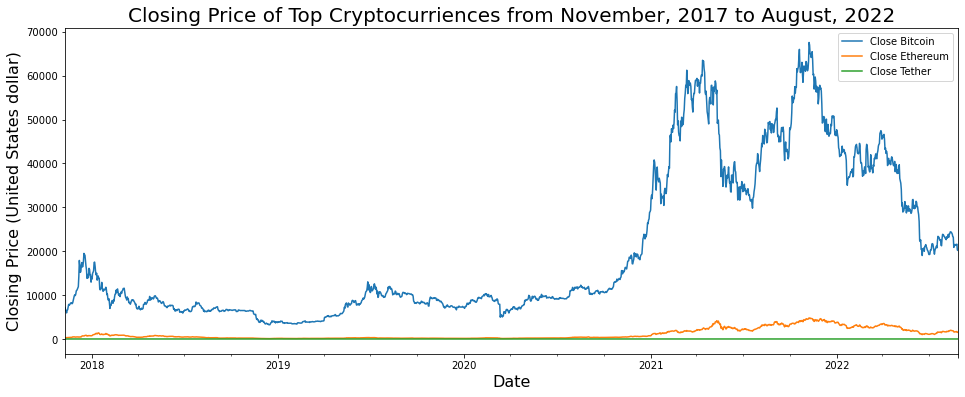

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = df.plot(figsize=(16,6))
ax.set_ylabel('Closing Price (United States dollar)', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.set_title('Closing Price of Top Cryptocurriences from November, 2017 to August, 2022', fontsize=20)
plt.show;

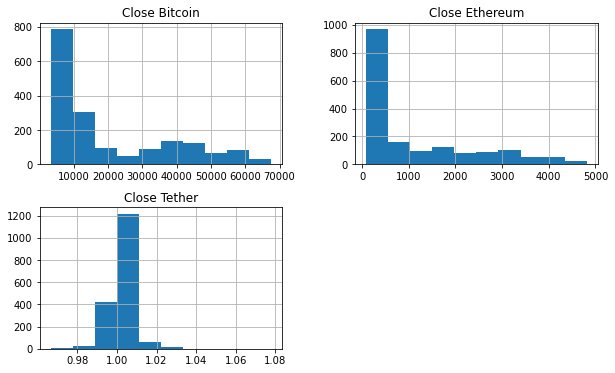

In [22]:
df.hist(figsize=(10,6));

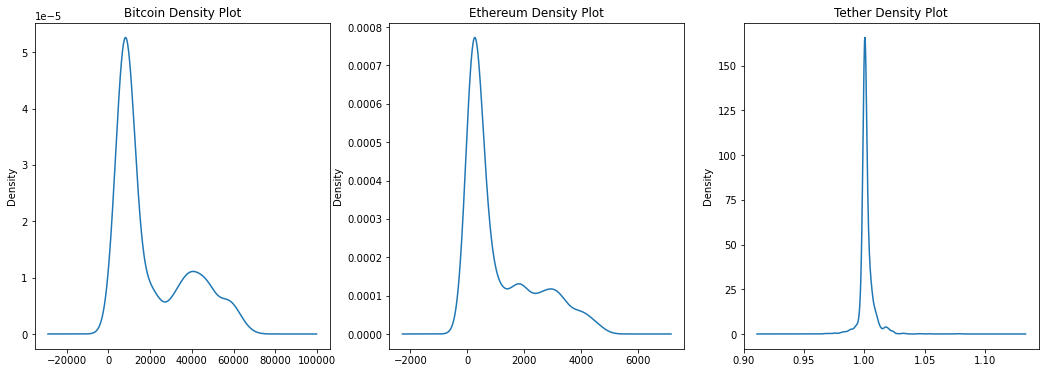

In [24]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18,6))
df['Close Bitcoin'].plot(kind='kde', ax=axes[0])
axes[0].set_title('Bitcoin Density Plot')
df['Close Ethereum'].plot(kind='kde', ax=axes[1])
axes[1].set_title('Ethereum Density Plot')
df['Close Tether'].plot(kind='kde', ax=axes[2])
axes[2].set_title('Tether Density Plot');

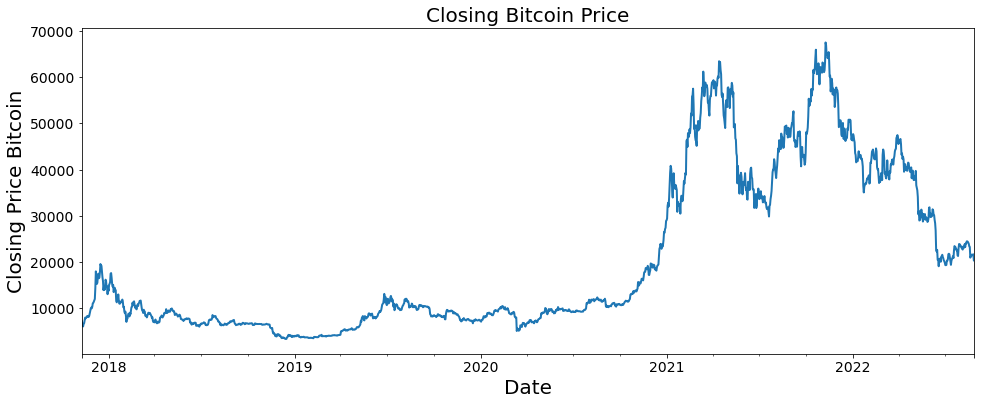

In [25]:
df['Close Bitcoin'].plot(figsize=(16,6), linewidth=2, fontsize=14)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Closing Price Bitcoin', fontsize=20)
plt.title('Closing Bitcoin Price', fontsize=20);

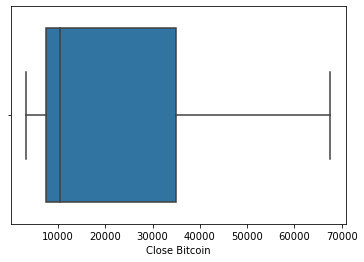

In [26]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.boxplot(df['Close Bitcoin']);

In [27]:
cutoff_bitcoin = round(df['Close Bitcoin'].shape[0]*0.8)
cutoff_bitcoin

1402

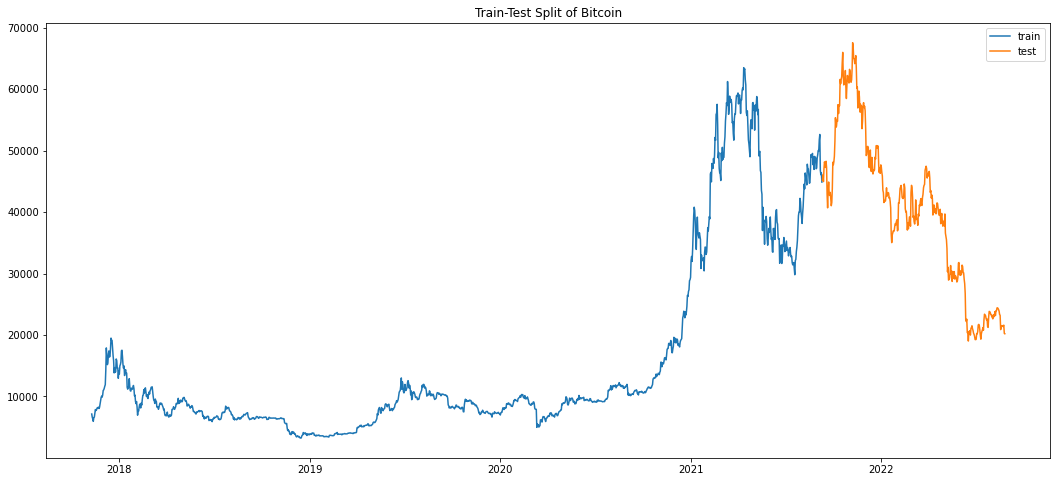

In [28]:
train_bitcoin = df['Close Bitcoin'][:cutoff_bitcoin]
test_bitcoin = df['Close Bitcoin'][cutoff_bitcoin:]
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(train_bitcoin, label='train')
ax.plot(test_bitcoin, label='test')
ax.set_title('Train-Test Split of Bitcoin')
plt.legend();

In [29]:
from sklearn.model_selection import TimeSeriesSplit
split = TimeSeriesSplit()
for train_ind, val_ind in split.split(train_bitcoin):
    print(train_ind, val_ind)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236] [237 238 239 240 241 242 243 244 245 

Bitcoin Baseline Model

In [30]:
baseline_bitcoin = train_bitcoin.shift(1)
baseline_bitcoin

Date
2017-11-09             NaN
2017-11-10     7143.580078
2017-11-11     6618.140137
2017-11-12     6357.600098
2017-11-13     5950.069824
                  ...     
2021-09-06    51753.410156
2021-09-07    52633.535156
2021-09-08    46811.128906
2021-09-09    46091.390625
2021-09-10    46391.421875
Name: Close Bitcoin, Length: 1402, dtype: float64

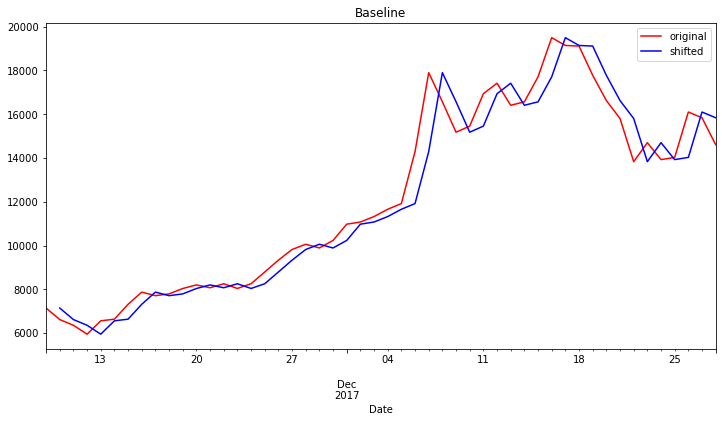

In [31]:
fig, ax = plt.subplots(figsize=(12,6))
train_bitcoin[0:50].plot(ax=ax, c='r', label='original')
baseline_bitcoin[0:50].plot(ax=ax, c='b', label='shifted')
ax.set_title('Baseline')
ax.legend();

In [32]:
import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(train_bitcoin[1:], baseline_bitcoin.dropna()))

913.3319925330534

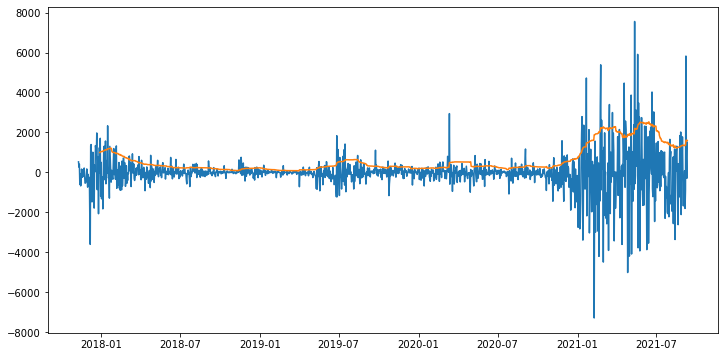

In [33]:
fig, ax = plt.subplots(figsize=(12,6))
residuals_bitcoin = baseline_bitcoin[1:] - train_bitcoin[1:]
ax.plot(residuals_bitcoin.index, residuals_bitcoin)
ax.plot(residuals_bitcoin.index, residuals_bitcoin.rolling(50).std());

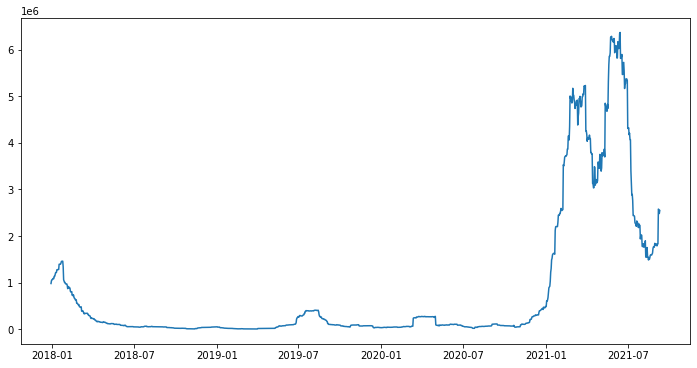

In [34]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(residuals_bitcoin.index, residuals_bitcoin.rolling(50).var());

Rolling standard deviation varies at different points in time. Tha is the result of the trends in the data.

In [35]:
def stationarity_check(DF):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = DF.rolling(window=8, center=False).mean()
    roll_std = DF.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(DF) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(16,6))
    orig = plt.plot(DF, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None


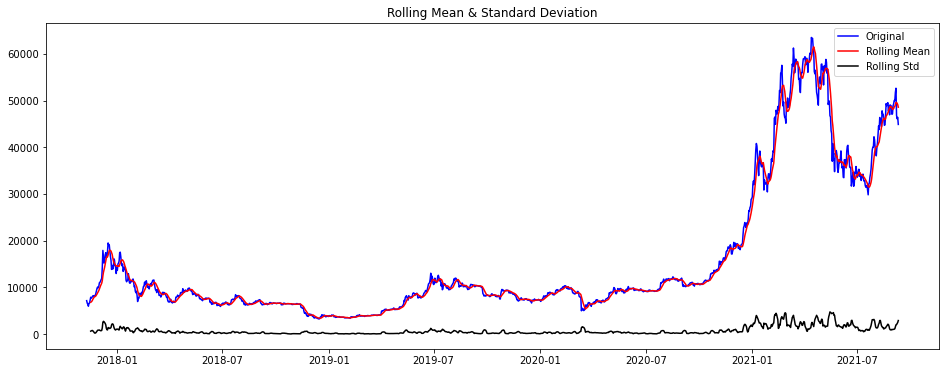

Results of Dickey-Fuller Test: 

Test Statistic                   -0.342250
p-value                           0.919304
#Lags Used                       24.000000
Number of Observations Used    1377.000000
Critical Value (1%)              -3.435108
Critical Value (5%)              -2.863641
Critical Value (10%)             -2.567889
dtype: float64


In [36]:
stationarity_check(train_bitcoin)

Bitcoin is not stationary.

Use differencing to see if the series becomes stationary

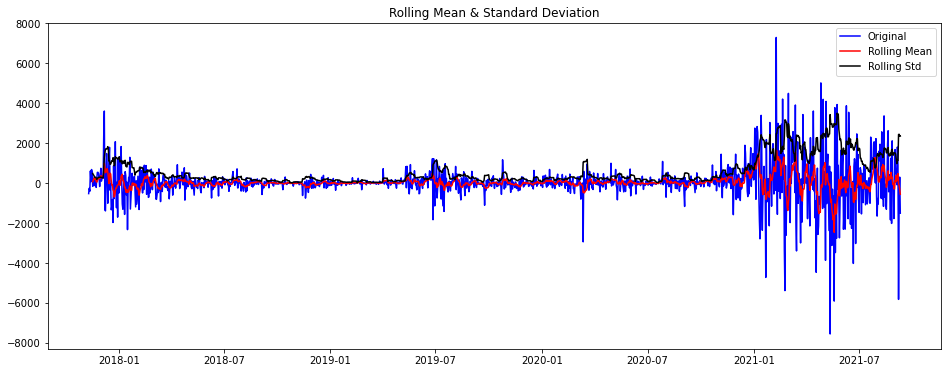

Results of Dickey-Fuller Test: 

Test Statistic                -7.445420e+00
p-value                        5.855767e-11
#Lags Used                     2.300000e+01
Number of Observations Used    1.377000e+03
Critical Value (1%)           -3.435108e+00
Critical Value (5%)           -2.863641e+00
Critical Value (10%)          -2.567889e+00
dtype: float64


In [37]:
bitcoin_train_diff = train_bitcoin.diff(periods=1)
bitcoin_train_diff.dropna(inplace=True)
stationarity_check(bitcoin_train_diff)

The bitcoin time series looks stationary now and is ready for modelling

Random Walk Model for Bitcoin

In [38]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
random_walk_model_bitcoin = ARIMA(train_bitcoin, order=(0,1,0)).fit()
y_hat_rw = random_walk_model_bitcoin.predict(typ='levels')
y_hat_rw

2017-11-09        0.000000
2017-11-10     7143.580078
2017-11-11     6618.140137
2017-11-12     6357.600098
2017-11-13     5950.069824
                  ...     
2021-09-06    51753.410156
2021-09-07    52633.535156
2021-09-08    46811.128906
2021-09-09    46091.390625
2021-09-10    46391.421875
Freq: D, Name: predicted_mean, Length: 1402, dtype: float64

In [39]:
random_walk_model_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                 1402
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -11538.689
Date:                Sat, 27 Aug 2022   AIC                          23079.379
Time:                        13:48:14   BIC                          23084.624
Sample:                    11-09-2017   HQIC                         23081.339
                         - 09-10-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.336e+05   1.09e+04     76.481      0.000    8.12e+05    8.55e+05
===================================================================================
Ljung-Box (L1) (Q):                   5.84   Jarque-Bera (JB):             12665.41
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               9.28   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
# Check the RMSE
np.sqrt(mean_squared_error(train_bitcoin, y_hat_rw))

932.72657681787

In [41]:
train_bitcoin.index

DatetimeIndex(['2017-11-09', '2017-11-10', '2017-11-11', '2017-11-12',
               '2017-11-13', '2017-11-14', '2017-11-15', '2017-11-16',
               '2017-11-17', '2017-11-18',
               ...
               '2021-09-01', '2021-09-02', '2021-09-03', '2021-09-04',
               '2021-09-05', '2021-09-06', '2021-09-07', '2021-09-08',
               '2021-09-09', '2021-09-10'],
              dtype='datetime64[ns]', name='Date', length=1402, freq=None)

In [42]:
train_bitcoin_with_ind = train_bitcoin.reset_index()
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(0,1,0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

1826.94315832213
4861.086647383968
1193.3835315012375
9203.27729815262
13577.850720526374


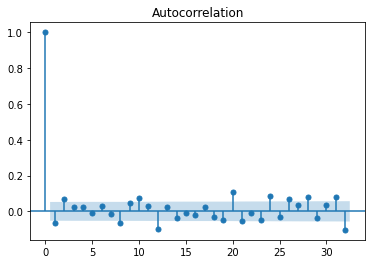

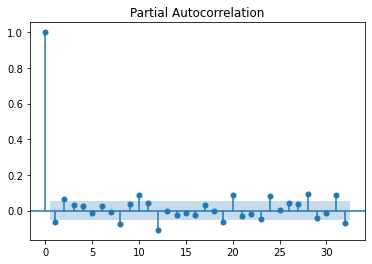

In [43]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(bitcoin_train_diff)
plot_pacf(bitcoin_train_diff);

AR model might be investigated first with lag length selected from the PACF or via empirical investigation. In our case, it's clearly that within 8 lags the AR is significant. Which means, we can use AR = 8. AR = 12 is another option.

The series show positive significant correlation at a lag 12, which suggests adding 12MA term.

In [57]:
ar_8_bitcoin = ARIMA(train_bitcoin, order=(8,1,0)).fit()
y_hat_ar8 = ar_8_bitcoin.predict(typ='levels')
y_hat_ar8

2017-11-09        0.000000
2017-11-10     6933.861606
2017-11-11     6861.036863
2017-11-12     6339.300041
2017-11-13     5957.790001
                  ...     
2021-09-06    51639.045153
2021-09-07    52697.543093
2021-09-08    47219.420468
2021-09-09    45757.838471
2021-09-10    46326.718515
Freq: D, Name: predicted_mean, Length: 1402, dtype: float64

In [58]:
ar_8_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                 1402
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -11532.783
Date:                Sat, 27 Aug 2022   AIC                          23071.565
Time:                        13:52:34   BIC                          23087.300
Sample:                    11-09-2017   HQIC                         23077.447
                         - 09-10-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0603      0.016     -3.868      0.000      -0.091      -0.030
ar.L2          0.0647      0.014      4.533      0.000       0.037       0.093
sigma2      8.281e+05   1.12e+04     74.046      0.000    8.06e+05     8.5e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             12004.23
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               8.99   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
np.sqrt(mean_squared_error(train_bitcoin, y_hat_ar8))

925.4073578095725

In [55]:
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(8,1,0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

1841.0841793209768
4855.527412065812
1191.8011396433953
9203.116180287683
13630.90506197251


In [59]:
ar_12_bitcoin = ARIMA(train_bitcoin, order=(12,1,0)).fit()
y_hat_ar12 = ar_12_bitcoin.predict(typ='levels')
y_hat_ar12

2017-11-09        0.000000
2017-11-10     6931.232403
2017-11-11     6858.444803
2017-11-12     6441.862505
2017-11-13     6023.780521
                  ...     
2021-09-06    51695.930979
2021-09-07    53201.864733
2021-09-08    46967.011495
2021-09-09    45436.331498
2021-09-10    46048.850041
Freq: D, Name: predicted_mean, Length: 1402, dtype: float64

In [60]:
ar_12_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                 1402
Model:                ARIMA(12, 1, 0)   Log Likelihood              -11510.463
Date:                Sat, 27 Aug 2022   AIC                          23046.927
Time:                        13:53:11   BIC                          23115.111
Sample:                    11-09-2017   HQIC                         23072.415
                         - 09-10-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0635      0.016     -3.981      0.000      -0.095      -0.032
ar.L2          0.0819      0.015      5.399      0.000       0.052       0.112
ar.L3          0.0402      0.015      2.619      0.009       0.010       0.070
ar.L4          0.0135      0.014      0.948      0.343      -0.014       0.041
ar.L5         -0.0099      0.015     -0.652      0.515      -0.040       0.020
ar.L6          0.0337      0.014      2.336      0.019       0.005       0.062
ar.L7         -0.0187      0.013     -1.424      0.154      -0.044       0.007
ar.L8         -0.0779      0.012     -6.361      0.000      -0.102      -0.054
ar.L9          0.0443      0.015      3.025      0.002       0.016       0.073
ar.L10         0.1058      0.017      6.083      0.000       0.072       0.140
ar.L11         0.0368      0.015      2.513      0.012       0.008       0.066
ar.L12        -0.1108      0.012     -8.969      0.000      -0.135      -0.087
sigma2      8.067e+05   1.22e+04     66.350      0.000    7.83e+05    8.31e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10081.88
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               8.76   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
np.sqrt(mean_squared_error(train_bitcoin, y_hat_ar12))

914.8175509751986

In [67]:
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(12,1,0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

1924.490606665191
4790.986898640147
1190.5468023874637
9114.979100913397
14337.92722101981


In [63]:
ma_12_bitcoin = ARIMA(train_bitcoin, order=(0,1,12)).fit()
y_hat_ma12 = ma_12_bitcoin.predict(typ='levels')
y_hat_ma12

2017-11-09        0.000000
2017-11-10     6945.021712
2017-11-11     6850.657663
2017-11-12     6427.779506
2017-11-13     6019.056319
                  ...     
2021-09-06    51845.386015
2021-09-07    53021.349307
2021-09-08    46986.267788
2021-09-09    45437.915187
2021-09-10    46174.723779
Freq: D, Name: predicted_mean, Length: 1402, dtype: float64

In [64]:
ma_12_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                 1402
Model:                ARIMA(0, 1, 12)   Log Likelihood              -11515.565
Date:                Sat, 27 Aug 2022   AIC                          23057.131
Time:                        13:55:09   BIC                          23125.315
Sample:                    11-09-2017   HQIC                         23082.619
                         - 09-10-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0625      0.016     -4.025      0.000      -0.093      -0.032
ma.L2          0.0786      0.015      5.210      0.000       0.049       0.108
ma.L3          0.0253      0.016      1.596      0.111      -0.006       0.056
ma.L4          0.0189      0.014      1.357      0.175      -0.008       0.046
ma.L5          0.0029      0.014      0.201      0.840      -0.025       0.031
ma.L6          0.0348      0.014      2.459      0.014       0.007       0.063
ma.L7         -0.0297      0.013     -2.309      0.021      -0.055      -0.004
ma.L8         -0.0556      0.012     -4.547      0.000      -0.080      -0.032
ma.L9          0.0518      0.014      3.716      0.000       0.025       0.079
ma.L10         0.0731      0.019      3.928      0.000       0.037       0.110
ma.L11         0.0140      0.015      0.962      0.336      -0.015       0.043
ma.L12        -0.0630      0.013     -4.744      0.000      -0.089      -0.037
sigma2      8.046e+05   1.18e+04     68.379      0.000    7.82e+05    8.28e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10813.85
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               8.86   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
np.sqrt(mean_squared_error(train_bitcoin, y_hat_ma12))

918.0504412408342

In [66]:
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(0,1,12)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

2228.7585334073524
4806.98019093964
1191.310081568573
9120.661355043825
14349.629008391188


In [ ]:
arma_model_bitcoin = ARIMA(train_bitcoin, order=(12,1,12)).fit()
y_hat_train = arma_model_bitcoin.predict(typ='levels')
y_hat_train

In [98]:
arma_model_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                 1402
Model:               ARIMA(12, 1, 12)   Log Likelihood              -11475.122
Date:                Sat, 27 Aug 2022   AIC                          23000.245
Time:                        15:37:26   BIC                          23131.368
Sample:                    11-09-2017   HQIC                         23049.260
                         - 09-10-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3016      0.114      2.640      0.008       0.078       0.525
ar.L2          0.2637      0.138      1.917      0.055      -0.006       0.533
ar.L3         -0.1914      0.106     -1.813      0.070      -0.398       0.015
ar.L4         -0.1611      0.122     -1.322      0.186      -0.400       0.078
ar.L5          0.0820      0.125      0.656      0.512      -0.163       0.327
ar.L6          0.1845      0.099      1.871      0.061      -0.009       0.378
ar.L7          0.1687      0.094      1.804      0.071      -0.015       0.352
ar.L8         -0.2732      0.099     -2.765      0.006      -0.467      -0.080
ar.L9         -0.1401      0.134     -1.045      0.296      -0.403       0.123
ar.L10         0.2021      0.119      1.693      0.090      -0.032       0.436
ar.L11         0.3388      0.102      3.331      0.001       0.139       0.538
ar.L12        -0.7289      0.086     -8.491      0.000      -0.897      -0.561
ma.L1         -0.3451      0.115     -2.989      0.003      -0.571      -0.119
ma.L2         -0.1599      0.142     -1.125      0.260      -0.438       0.119
ma.L3          0.2122      0.108      1.970      0.049       0.001       0.423
ma.L4          0.1339      0.123      1.085      0.278      -0.108       0.376
ma.L5         -0.0734      0.131     -0.560      0.575      -0.330       0.183
ma.L6         -0.1460      0.106     -1.383      0.167      -0.353       0.061
ma.L7         -0.2219      0.104     -2.137      0.033      -0.425      -0.018
ma.L8          0.2311      0.108      2.143      0.032       0.020       0.443
ma.L9          0.2204      0.139      1.586      0.113      -0.052       0.493
ma.L10        -0.1533      0.118     -1.297      0.194      -0.385       0.078
ma.L11        -0.3787      0.104     -3.631      0.000      -0.583      -0.174
ma.L12         0.6959      0.086      8.063      0.000       0.527       0.865
sigma2      7.556e+05   1.35e+04     55.928      0.000    7.29e+05    7.82e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              7948.70
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               8.45   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [99]:
np.sqrt(mean_squared_error(train_bitcoin, y_hat_train))

892.9555950943744

In [72]:
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(12,1,12)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

2074.5901315917686
4810.63910476775
1194.5781469378546
9082.036021624956
10387.978069233459


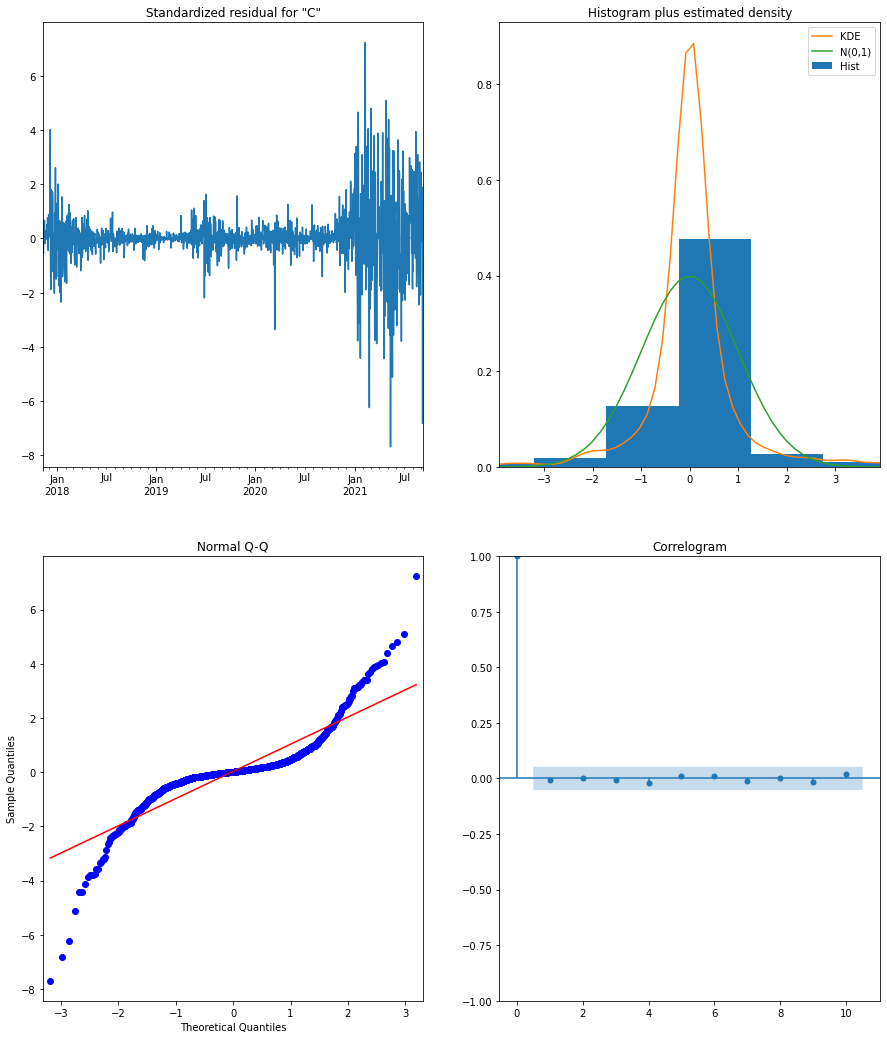

In [78]:
arma_model_bitcoin.plot_diagnostics(figsize=(15, 18))
plt.show()

The test has failed. We see a recurring correlation exists in both ACF and PACF. So we need to deal with seasonality.

In [74]:
print(random_walk_model_bitcoin.aic)
print(ar_8_bitcoin.aic)
print(ar_12_bitcoin.aic)
print(ma_12_bitcoin.aic)
print(arma_model_bitcoin.aic)

23079.378765156653
23071.565019432048
23046.92666463639
23057.13065264644
23000.24489988773


In [75]:
def find_rmse(model, train_data=train_bitcoin):
    y_hat = model.predict(typ='levels')
    return np.sqrt(mean_squared_error(train_data, y_hat))

In [76]:
print(find_rmse(random_walk_model_bitcoin))
print(find_rmse(ar_8_bitcoin))
print(find_rmse(ar_12_bitcoin))
print(find_rmse(ma_12_bitcoin))
print(find_rmse(arma_model_bitcoin))

932.72657681787
928.9643443532411
914.8175509751986
918.0504412408342
892.9555950943744


In [77]:
p_values = range(0,13)
d_values = [1]
q_values = range(0,13)

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            warnings.filterwarnings("ignore")
            model = ARIMA(train_bitcoin, order=order).fit()
            predictions = model.predict(typ='levels')
            error = np.sqrt(mean_squared_error(train_bitcoin, predictions))
            print('ARIMA%s RMSE=%.3f' % (order, error))

ARIMA(0, 1, 0) RMSE=932.727
ARIMA(0, 1, 1) RMSE=931.077
ARIMA(0, 1, 2) RMSE=928.846
ARIMA(0, 1, 3) RMSE=928.567
ARIMA(0, 1, 4) RMSE=928.256
ARIMA(0, 1, 5) RMSE=928.254
ARIMA(0, 1, 6) RMSE=927.701
ARIMA(0, 1, 7) RMSE=927.040
ARIMA(0, 1, 8) RMSE=924.692
ARIMA(0, 1, 9) RMSE=922.685
ARIMA(0, 1, 10) RMSE=919.734
ARIMA(0, 1, 11) RMSE=919.667
ARIMA(0, 1, 12) RMSE=918.050
ARIMA(1, 1, 0) RMSE=930.852
ARIMA(1, 1, 1) RMSE=929.778
ARIMA(1, 1, 2) RMSE=928.344
ARIMA(1, 1, 3) RMSE=928.333
ARIMA(1, 1, 4) RMSE=928.177
ARIMA(1, 1, 5) RMSE=928.254
ARIMA(1, 1, 6) RMSE=927.581
ARIMA(1, 1, 7) RMSE=926.578
ARIMA(1, 1, 8) RMSE=924.134
ARIMA(1, 1, 9) RMSE=921.021
ARIMA(1, 1, 10) RMSE=919.709
ARIMA(1, 1, 11) RMSE=918.229
ARIMA(1, 1, 12) RMSE=917.252
ARIMA(2, 1, 0) RMSE=928.964
ARIMA(2, 1, 1) RMSE=928.329
ARIMA(2, 1, 2) RMSE=928.327
ARIMA(2, 1, 3) RMSE=928.265
ARIMA(2, 1, 4) RMSE=912.911
ARIMA(2, 1, 5) RMSE=920.662
ARIMA(2, 1, 6) RMSE=911.215
ARIMA(2, 1, 7) RMSE=920.639
ARIMA(2, 1, 8) RMSE=910.625
ARIMA(2, 1, 9)

In [100]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 7)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, [1], q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, [1], q))]

In [ ]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = SARIMAX(train_bitcoin,
                          order=comb,
                          seasonal_order=combs,
                          enforce_stationarity=False,
                          enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
        except:
            continue
            
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

In [110]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq        (0, 1, 3)
pdqs    (0, 1, 4, 4)
aic          22013.7
Name: 79, dtype: object

In [115]:
ARIMA_MODEL = SARIMAX(train_bitcoin, 
                      order=(0, 1, 3), 
                      seasonal_order=(0, 1, 4, 4), 
                      enforce_stationarity=False, 
                      enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()
print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2350      0.012     19.796      0.000       0.212       0.258
ma.L2          0.0371      0.015      2.438      0.015       0.007       0.067
ma.L3         -0.0342      0.015     -2.319      0.020      -0.063      -0.005
ma.S.L4       -0.9038      0.020    -45.430      0.000      -0.943      -0.865
ma.S.L8       -0.1699      0.018     -9.399      0.000      -0.205      -0.134
ma.S.L12       0.0195      0.019      1.020      0.308      -0.018       0.057
ma.S.L16       0.0542      0.015      3.606      0.000       0.025       0.084
sigma2      5.181e+05   3.73e-08   1.39e+13      0.000    5.18e+05    5.18e+05


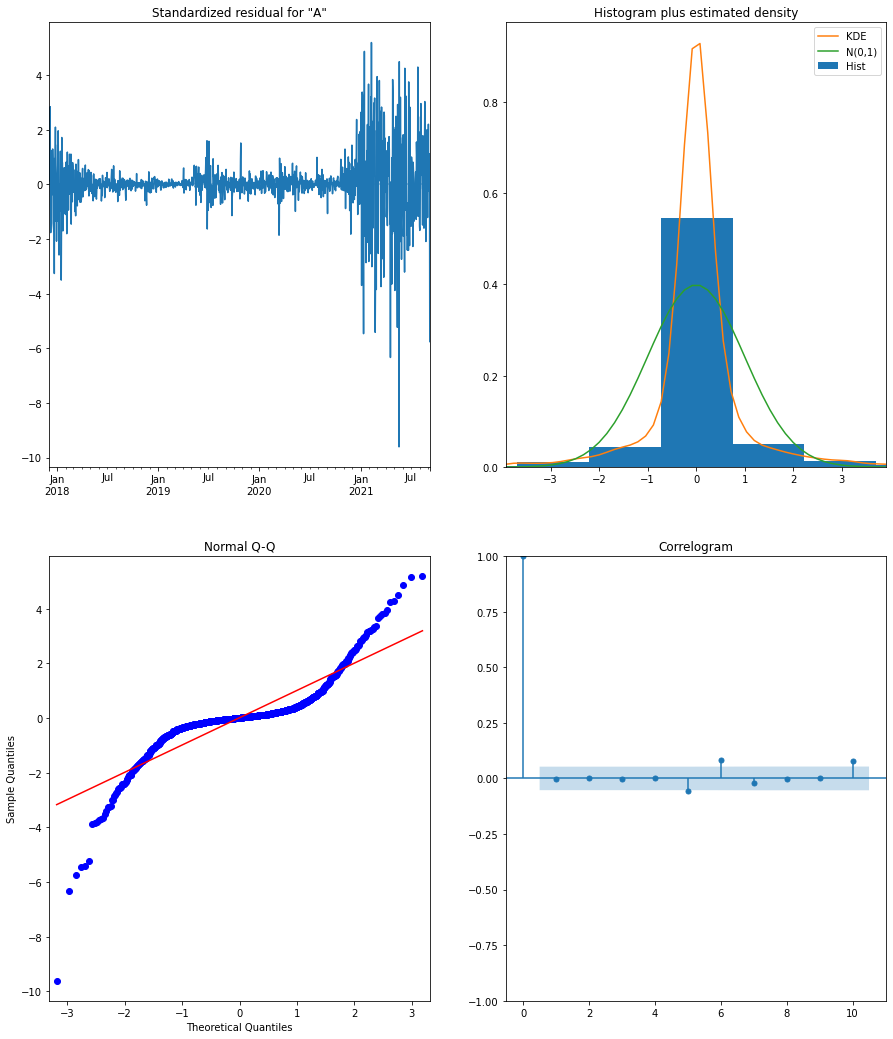

In [116]:
output.plot_diagnostics(figsize=(15, 18))
plt.show()

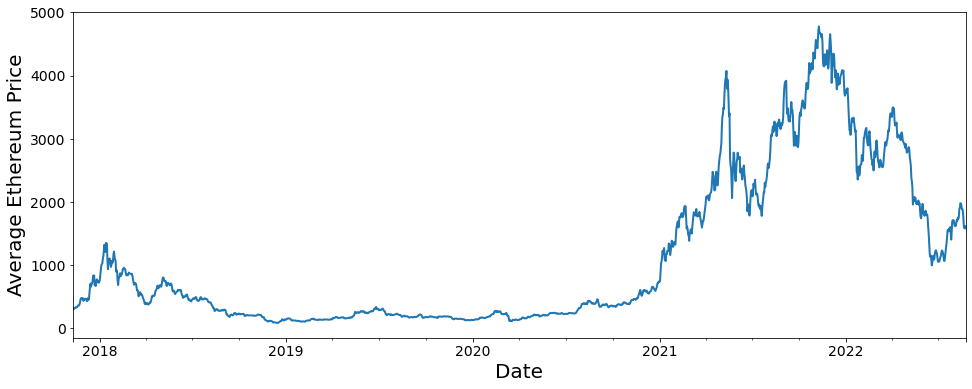

In [120]:
df['Average Price Ethereum'].plot(figsize=(16,6), linewidth=2, fontsize=14)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Average Ethereum Price', fontsize=20);

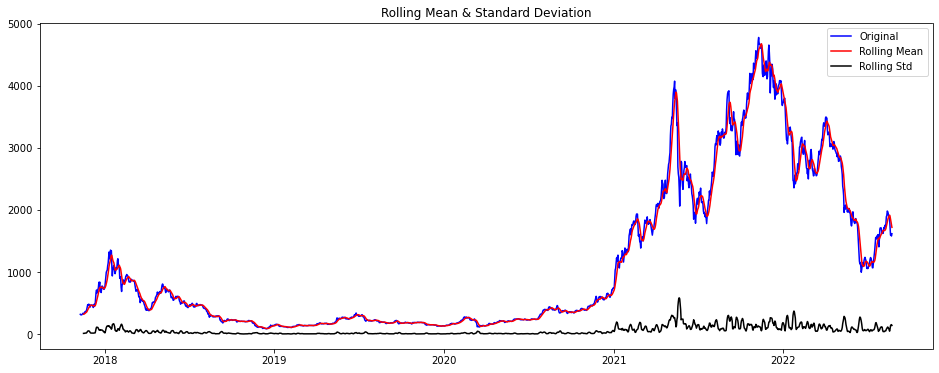

Results of Dickey-Fuller Test: 

Test Statistic                   -1.394762
p-value                           0.584785
#Lags Used                        8.000000
Number of Observations Used    1740.000000
Critical Value (1%)              -3.434114
Critical Value (5%)              -2.863202
Critical Value (10%)             -2.567655
dtype: float64


In [128]:
stationarity_check(df['Average Price Ethereum'])

 not stationary

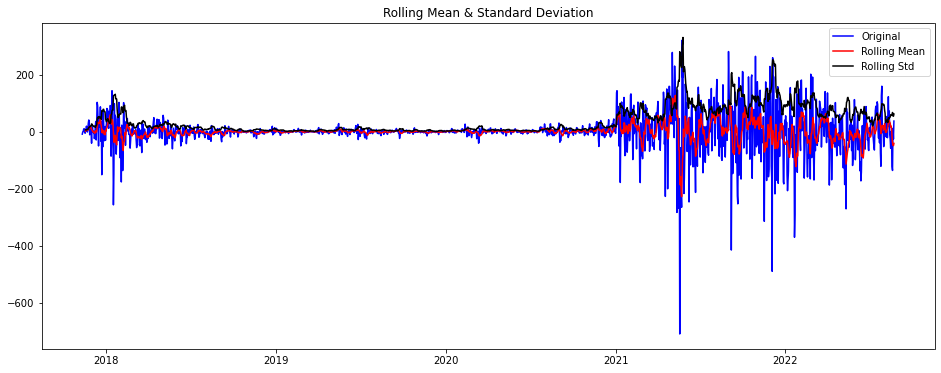

Results of Dickey-Fuller Test: 

Test Statistic                -7.382072e+00
p-value                        8.421422e-11
#Lags Used                     2.500000e+01
Number of Observations Used    1.722000e+03
Critical Value (1%)           -3.434153e+00
Critical Value (5%)           -2.863220e+00
Critical Value (10%)          -2.567664e+00
dtype: float64


In [129]:
ethereum_diff = df['Average Price Ethereum'].diff(periods=1)
ethereum_diff.dropna(inplace=True)
stationarity_check(ethereum_diff)

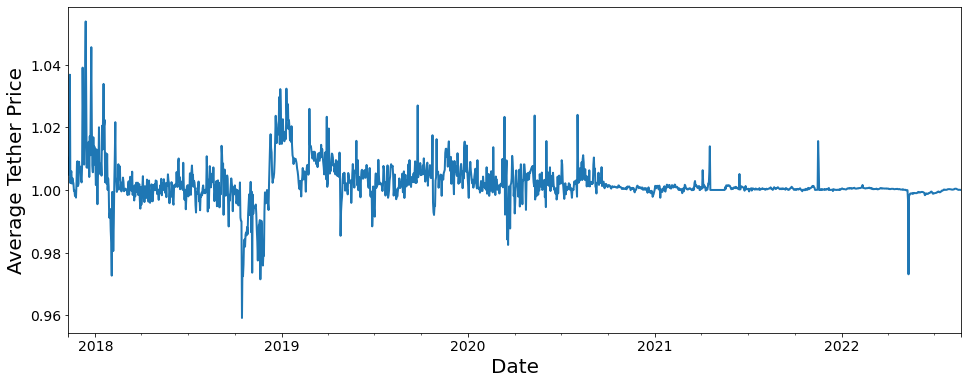

In [130]:
df['Average Price Tether'].plot(figsize=(16,6), linewidth=2, fontsize=14)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Average Tether Price', fontsize=20);

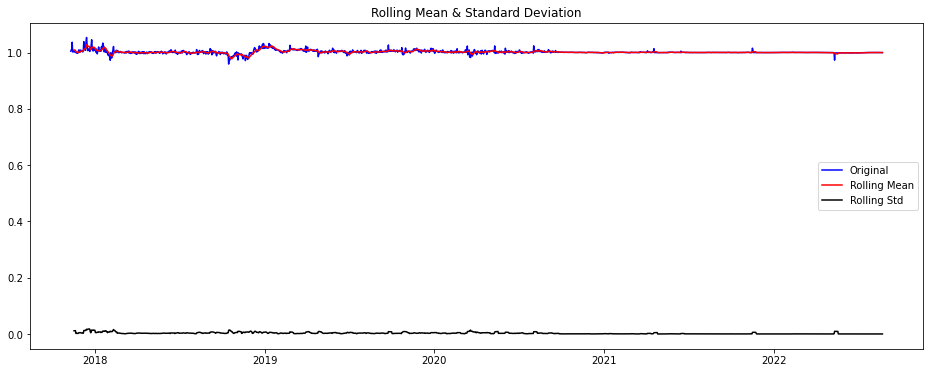

Results of Dickey-Fuller Test: 

Test Statistic                   -4.822168
p-value                           0.000049
#Lags Used                       20.000000
Number of Observations Used    1728.000000
Critical Value (1%)              -3.434140
Critical Value (5%)              -2.863214
Critical Value (10%)             -2.567661
dtype: float64


In [131]:
stationarity_check(df['Average Price Tether'])

Tether is stationary (test statistic is less than critical value)

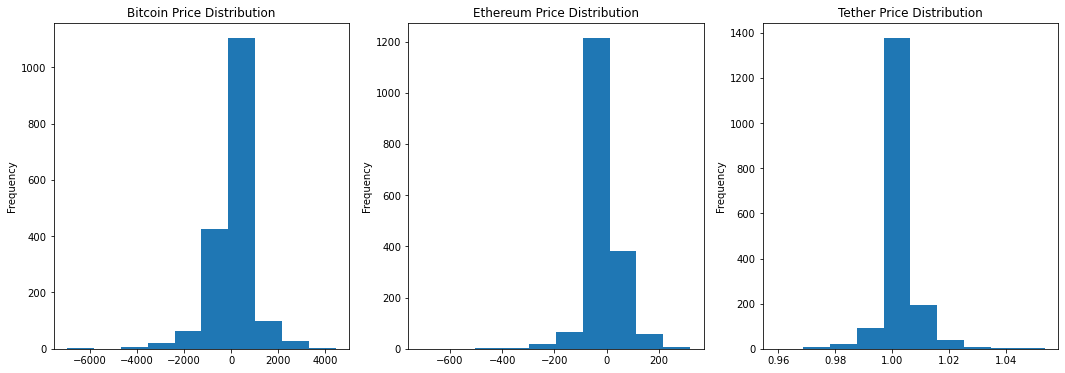

In [132]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18,6))
bitcoin_diff.plot(kind='hist', ax=axes[0])
axes[0].set_title('Bitcoin Price Distribution')
ethereum_diff.plot(kind='hist', ax=axes[1])
axes[1].set_title('Ethereum Price Distribution')
df['Average Price Tether'].plot(kind='hist', ax=axes[2])
axes[2].set_title('Tether Price Distribution');

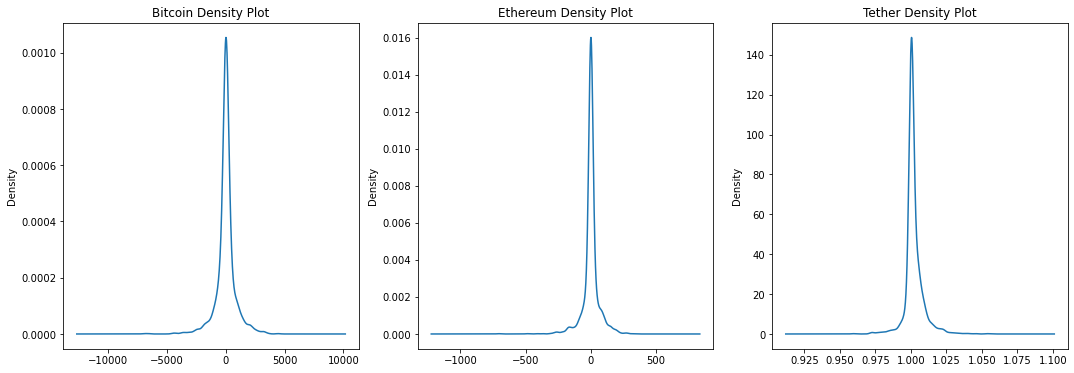

In [133]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18,6))
bitcoin_diff.plot(kind='kde', ax=axes[0])
axes[0].set_title('Bitcoin Density Plot')
ethereum_diff.plot(kind='kde', ax=axes[1])
axes[1].set_title('Ethereum Density Plot')
df['Average Price Tether'].plot(kind='kde', ax=axes[2])
axes[2].set_title('Tether Density Plot');

Nothing is white noise process since mean and std are not constant over time

In [137]:
bitcoin = pd.DataFrame(bitcoin_diff)
ethereum = pd.DataFrame(ethereum_diff)
final_df = bitcoin.join(
    ethereum, how='outer', rsuffix=' Ethereum').join(
    df['Average Price Tether'], how='outer', rsuffix=' Tether')
final_df.dropna(inplace=True)
final_df

,Average Price Bitcoin,Average Price Ethereum,Average Price Tether
Date,,,
2017-11-10,-399.739990,-8.624009,1.009858
2017-11-11,-335.750000,-0.807495,1.011005
2017-11-12,-466.655273,0.010513,1.036755
2017-11-13,255.710205,8.886994,1.002197
2017-11-14,285.625000,10.750000,1.005164
...,...,...,...
2022-08-19,-1329.636719,-122.450257,1.000061
2022-08-20,-937.311523,-135.958313,1.000053
2022-08-21,282.252930,11.732727,1.000052


In [138]:
final_df.corr()

,Average Price Bitcoin,Average Price Ethereum,Average Price Tether
Average Price Bitcoin,1.000000,0.754439,-0.001664
Average Price Ethereum,0.754439,1.000000,0.019570
Average Price Tether,-0.001664,0.019570,1.000000


The average price for ethereum and bitcoin are highly correlated

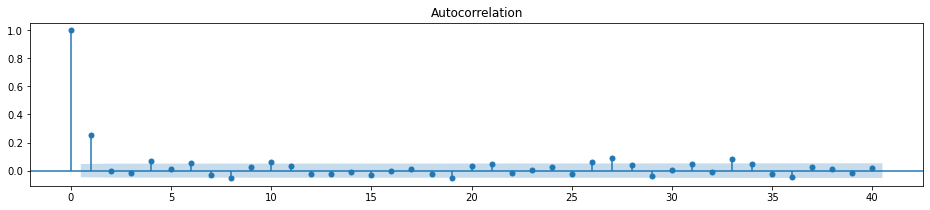

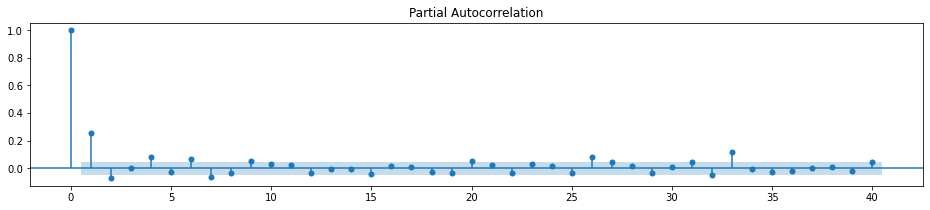

In [157]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(final_df['Average Price Bitcoin'], ax=ax, lags=40);
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(final_df['Average Price Bitcoin'], ax=ax, lags=40);

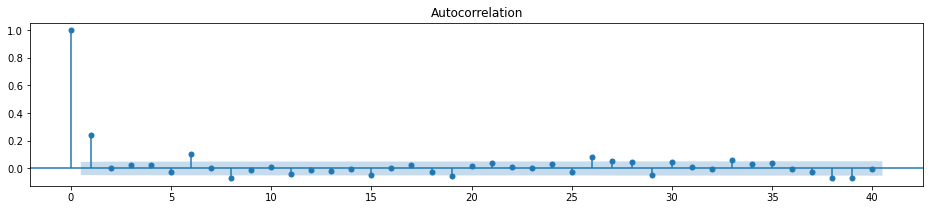

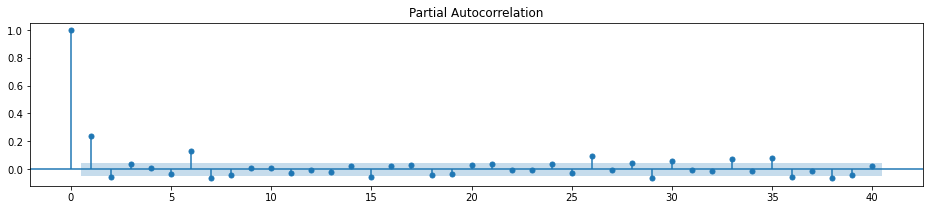

In [158]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(final_df['Average Price Ethereum'], ax=ax, lags=40);
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(final_df['Average Price Ethereum'], ax=ax, lags=40);

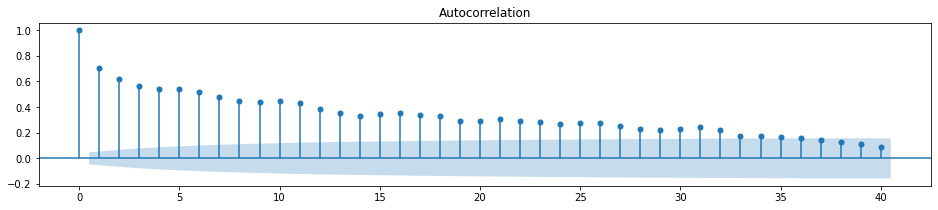

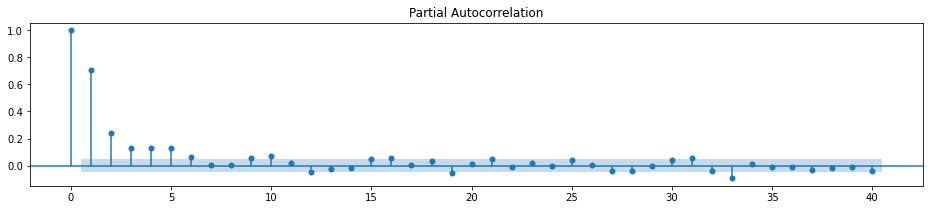

In [159]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(final_df['Average Price Tether'], ax=ax, lags=40);
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(final_df['Average Price Tether'], ax=ax, lags=40);